In [2]:
# We start by doing the required imports

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
N = 100 # Number of data points
X = np.random.random(N) * 10 - 5 # Random data in range [-5, 5]
y = 0.5 * X - 1 + np.random.randn(N) # A line plus noise

print(X.shape)
# True slope = 0.5
# True line intercept = -1
# Gaussia noise with mean=0 and variance=1 is added as this is directly linked with MSE as a loss function

(100,)


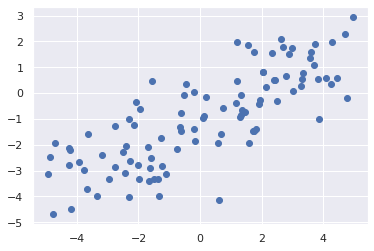

In [4]:
plt.scatter(X, y) # Visualise the data

In [5]:
# Create the linear regression model 
# The model has 1 input and 1 output
model = nn.Linear(1,1)

In [6]:
# Define the loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.05)

In [7]:
# Reshape the data and define the inputs
X = X.reshape(N,1) # Number of samples x Number of Dimensions
y = y.reshape(N,1)

print(X.shape)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

(100, 1)


In [9]:
# Now we train the model
number_epochs = 30
losses = []
for iteration in range(number_epochs):
    optimizer.zero_grad() # zero the parameter gradients. PyTorch accumulates the gradients for every .backward() call
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    print('Epoch {}/{}, Loss: {:.6f}'.format(iteration+1, number_epochs, loss.item()))

Epoch 1/30, Loss: 1.217078
Epoch 2/30, Loss: 1.216785
Epoch 3/30, Loss: 1.216548
Epoch 4/30, Loss: 1.216356
Epoch 5/30, Loss: 1.216201
Epoch 6/30, Loss: 1.216074
Epoch 7/30, Loss: 1.215972
Epoch 8/30, Loss: 1.215889
Epoch 9/30, Loss: 1.215822
Epoch 10/30, Loss: 1.215768
Epoch 11/30, Loss: 1.215724
Epoch 12/30, Loss: 1.215688
Epoch 13/30, Loss: 1.215659
Epoch 14/30, Loss: 1.215635
Epoch 15/30, Loss: 1.215616
Epoch 16/30, Loss: 1.215601
Epoch 17/30, Loss: 1.215588
Epoch 18/30, Loss: 1.215578
Epoch 19/30, Loss: 1.215570
Epoch 20/30, Loss: 1.215563
Epoch 21/30, Loss: 1.215558
Epoch 22/30, Loss: 1.215553
Epoch 23/30, Loss: 1.215550
Epoch 24/30, Loss: 1.215547
Epoch 25/30, Loss: 1.215545
Epoch 26/30, Loss: 1.215543
Epoch 27/30, Loss: 1.215541
Epoch 28/30, Loss: 1.215540
Epoch 29/30, Loss: 1.215539
Epoch 30/30, Loss: 1.215538


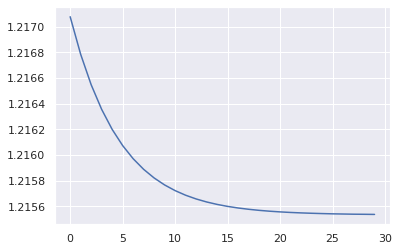

In [10]:
# Plot the losses
plt.plot(losses)

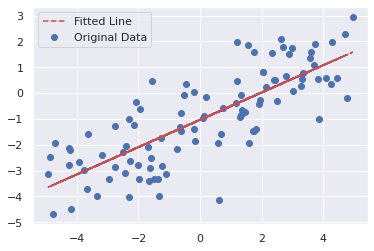

In [14]:
# Plot the graph of predictions
predicted = model(inputs).detach().numpy()
plt.scatter(X, y, label='Original Data')
plt.plot(X, predicted, label='Fitted Line', color='r', linestyle='--')
plt.legend()
plt.show()

In [15]:
# Test the model values (true w = 0.5, b = -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.5280149]] [-1.0333322]
